In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

Wczytanie przetworzonego pliku oraz wyświetlenie jego początku

In [2]:
df = pd.read_csv("../AnalysisData/tb_clean.csv")
df_head = str(df.head(7))
df.head(7)

,country,year,sex,ages,cases
0,AD,1996,m,0-14,0.0
1,AD,1996,m,15-24,0.0
2,AD,1996,m,25-34,0.0
3,AD,1996,m,35-44,4.0
4,AD,1996,m,45-54,1.0
5,AD,1996,m,55-64,0.0
6,AD,1996,m,65+,0.0


Opis oraz informacje o danych

In [3]:
# informacje o danych
buffer = io.StringIO()
df.info(buf=buffer)
info = buffer.getvalue()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35513 entries, 0 to 35512
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  35513 non-null  object 
 1   year     35513 non-null  int64  
 2   sex      35513 non-null  object 
 3   ages     35513 non-null  object 
 4   cases    35513 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB



In [4]:
# opis zmiennych numerycznych
num = str(df.describe(include=[np.number]))
print(num)

               year         cases
count  35513.000000  35513.000000
mean    2002.019627    611.754315
std        4.349940   3288.900135
min     1980.000000      0.000000
25%     1999.000000      4.000000
50%     2002.000000     36.000000
75%     2006.000000    244.000000
max     2008.000000  90498.000000


In [5]:
# opis zmiennych nienumerycznych
non_num = str(df.describe(include=[object]))
print(non_num)

       country    sex   ages
count    35513  35513  35513
unique     212      2     10
top         CA      m  45-54
freq       420  17802   4789


Utworzenie pliku tekstowego DataAppendix.txt oraz zapisanie do niego danych

In [6]:
with open('../Documents/DataAppendix.txt', 'w') as file:
    file.write("Data appendix dla przetworzonego pliku: tb_clean.csv\n\n")
    file.write("Head of data:\n")
    file.write(df_head)
    file.write("\n\nInformacje o danych:\n")
    file.write(info)
    file.write("\n\nOpis zmiennych numerycznych:\n")
    file.write(num)
    file.write("\n\nOpis zmiennych nienumerycznych:\n")
    file.write(non_num)

Utworzenie wykresów i zapisanie ich do osobnych plików

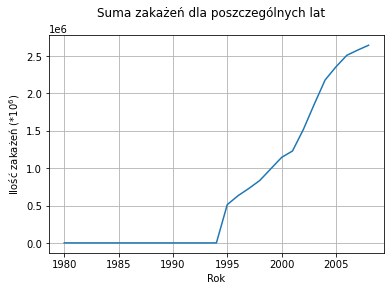

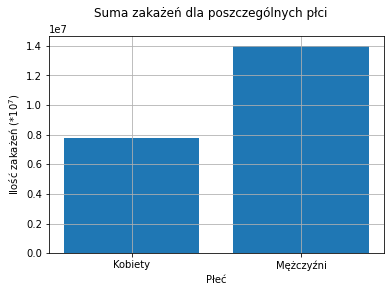

In [7]:
year_cases = df.groupby('year')['cases'].sum()
fig1, ax1 = plt.subplots()
fig1.suptitle('Suma zakażeń dla poszczególnych lat')
ax1.plot(year_cases)
ax1.grid()
ax1.set_ylabel('Ilość zakażeń ($*10^6$)')
ax1.set_xlabel('Rok')
fig1.savefig('../Documents/plot_year_cases.png')

sex_cases = df.groupby('sex')['cases'].sum()
fig2, ax2 = plt.subplots()
fig2.suptitle('Suma zakażeń dla poszczególnych płci')
ax2.bar(['Kobiety', 'Mężczyźni'], sex_cases)
ax2.grid()
ax2.set_ylabel('Ilość zakażeń ($*10^7$)')
ax2.set_xlabel('Płeć')
fig2.savefig('../Documents/plot_sex_cases.png')